<a href="https://colab.research.google.com/github/LukasPurbaW/10_Days_of_Deep_Learning/blob/main/Look_Up_Video_Timestamp_from_Indonesian_Word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Video's Word Timestamp
This Code is used to scrap Video's timestamp where Indonesian Holomembers speak the Indonesian words

In [ ]:
!pip -qq install youtube-transcript-api
!pip -qq install pillow

In [ ]:
## Video ID
#url = https://youtu.be/DTo5ZLLgnKY

video_id = 'DTo5ZLLgnKY'
thumbnail_url = "http://img.youtube.com/vi/%s/0.jpg" % video_id

#to do list 
# 1. Regex to get id from video_url

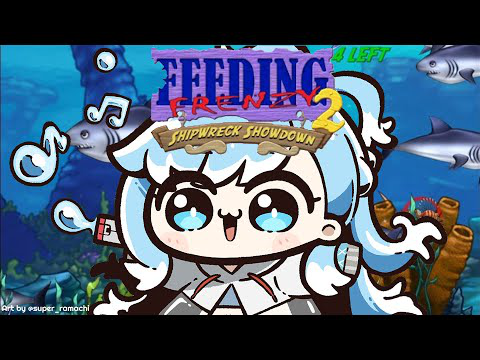

In [ ]:
import urllib.request
from PIL import Image
urllib.request.urlretrieve(thumbnail_url, 'Kobo')
img = Image.open('Kobo')
img

### Extract the CC from the video

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import JSONFormatter

formatter = JSONFormatter()
subtitle = YouTubeTranscriptApi.get_transcript(video_id,
                                          languages=['id'])

json_formatted = formatter.format_transcript(subtitle)

with open(video_id +'.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_formatted)

### In here you get the start timestamp and the duration

In [ ]:
import pandas as pd
import json

# Use pandas.DataFrame.from_dict() to Convert JSON to DataFrame
df = pd.read_json(video_id +'.json')
df.sample(10)

,text,start,duration
238,Mati satu kali ya guys karena kelalaian,902.880,6.75
2437,okeh gampang-gampang berarti,9223.829,3.92
660,Goblin,2494.259,3.00
168,enak-enakan Lagi ngeliatin yang,628.800,5.24
1308,memang jodoh,4929.980,3.39
2549,lemburannya seorang seseorangnya obat,9594.810,6.99
112,nanti aneh snack sini aja,456.889,7.18
1997,kedua,7566.270,3.00
1506,joknya semua,5769.900,2.78
247,Oh ya kalian kau tahu ya bapakku kan,942.870,6.07


In [ ]:
df_text = df['text'].str.split(" ",n=-1,expand=True)
df_text.sample(10)

,0,1,2,3,4,5,6,7,8,9
287,Iyo,atau,apalah,yg,sudah,None,None,None,None,None
682,Ini,tuh,None,None,None,None,None,None,None,None
928,oh,Wow,enaknya,buruan,melindungi,kita,None,None,None,None
1869,[Musik],None,None,None,None,None,None,None,None,None
1828,sangat,cukur,sangat,tuh,None,None,None,None,None,None
234,enggak,ada,mutiara,ya,None,None,None,None,None,None
896,debut,ikan,warna-warni,lagi,None,None,None,None,None,None
777,[Musik],None,None,None,None,None,None,None,None,None
2229,[Musik],None,None,None,None,None,None,None,None,None
1229,[Musik],None,None,None,None,None,None,None,None,None


In [ ]:
#testing (i just write this to remember how to access the data)
i = 1376
df_text.iloc[i][2]
# To do list : Delete this

'satu'

### Use dictionary to search the words you are looking for

In [ ]:
dictionary_url = 'https://raw.githubusercontent.com/holodata/learn-bahasa-indonesia/main/dictionary.json'
df_dict = pd.read_json(dictionary_url)
df_dict = df_dict.T
df_dict.head(5)

,meaning,frequency
hai,Hey,7221
ya,Yes,3949
aku,"I, me",3577
ini,"This, these",2241
yang,"The one who, the thing which",1817


### Searching the words based on the dictionary index
Here I'm searching every stamps that use "AKU"

In [ ]:
n = df_text.shape[1]
for i in range(1):
  for x in range(len(df_dict)):
    df_text[df_text[i]==df_dict.index[x]]
## So Slowwwwwww need better way to iterate this
# To do list :
# 1. Create faster method to iterate

In [ ]:
## Finding aku in the video
index_stamp = df_text[df_text[0]==df_dict.index[2]]
index_stamp.index

Int64Index([  69,  151,  174,  280,  294,  408,  547,  552,  558,  576,  582,
             693,  940, 1151, 1215, 1288, 1292, 1293, 1423, 1461, 1463, 1646,
            1714, 1767, 1771, 1773, 1945, 2031, 2054, 2202, 2250, 2392, 2397,
            2427, 2455, 2604],
           dtype='int64')

### Joining the words that you are looking for with the timestamp

In [ ]:
index_stamp.join(df)
# With this you know which time stamp produce the word ("aku")
# start shows when she speak the sentence in seconds

# To do list
# Translate the whole sentence or words by words (?)

,0,1,2,3,4,5,6,7,8,9,text,start,duration
69,aku,sakit,aku,sakit,radang,tenggorokan,None,None,None,None,aku sakit aku sakit radang tenggorokan,326.580,5.919
151,aku,nggak,bisa,lihat,kok,sambil,lihat,None,None,None,aku nggak bisa lihat kok sambil lihat,573.520,6.830
174,aku,nggak,mau,pilih,model,lebih,Mama,apa,None,None,aku nggak mau pilih model lebih Mama apa,658.709,4.771
280,aku,pakaiin,Rudi,Tabuti,akehe,Kenji,None,None,None,None,aku pakaiin Rudi Tabuti akehe Kenji,1064.470,5.860
294,aku,main,lagi,kayak,kita,mau,warnanya,None,None,None,aku main lagi kayak kita mau warnanya,1117.290,4.710
408,aku,Savira,None,None,None,None,None,None,None,None,aku Savira,1526.470,7.610
547,aku,udah,ganti,nama,kamu,dua,kali,film,None,None,aku udah ganti nama kamu dua kali film,2042.370,5.970
552,aku,enggak,biasanya,dotnya,eh,maaf,ya,None,None,None,aku enggak biasanya dotnya eh maaf ya,2067.780,5.410
558,aku,ya,kamu,masih,bisa,makan,banyak,ikan,None,None,aku ya kamu masih bisa makan banyak ikan,2093.570,6.760
576,aku,ini,sepertinya,berbahaya,None,None,None,None,None,None,aku ini sepertinya berbahaya,2161.590,8.250
